## Sam Lademan
## Assignment 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
titanic_data = pd.read_csv(r"C:\Users\Sam\titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
col_name = "Survived"
first_col = titanic_data.pop(col_name)
titanic_data.insert(6, col_name, first_col)
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [5]:
titanic_data.Sex[titanic_data.Sex == 'female'] = 0
titanic_data.Sex[titanic_data.Sex == 'male'] = 1
titanic_data["Sex"] = titanic_data["Sex"].astype(str).astype(int)
titanic_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [6]:
titanic_data.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [7]:
totalSurvived = titanic_data['Survived'].sum()
total = titanic_data.shape[0] + 1
totalPerished = total - totalSurvived

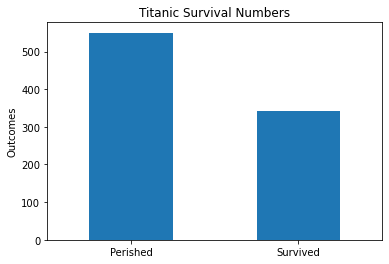

In [8]:
counts = titanic_data['Survived'].value_counts()
w=.35


subdf = pd.DataFrame({'Alive':['Perished', 'Survived'], 'Count':[totalPerished, totalSurvived]})

ax = subdf.plot.bar(x='Alive',y='Count',rot=0,legend=False,title='Titanic Survival Numbers')
ax.set_xlabel("")
ax.set_ylabel("Outcomes")

plt.show()


In [9]:
titanic_data.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [10]:
titanic_data.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [11]:
subdf = pd.DataFrame(titanic_data.groupby('Survived').mean())


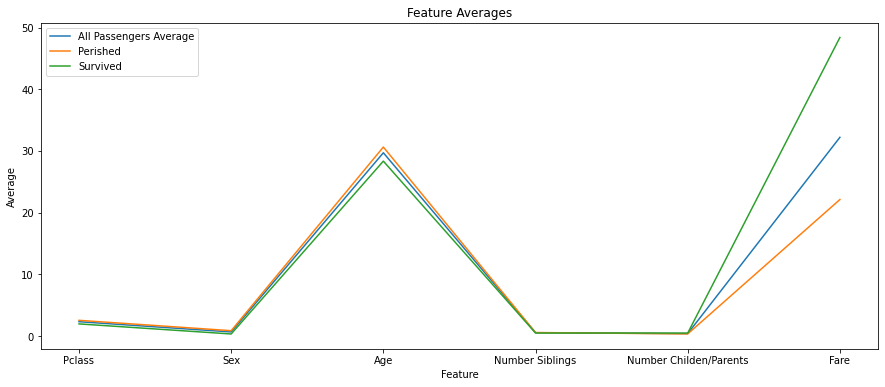

In [12]:
allAvg = np.array(titanic_data.mean())
allAvg = np.delete(allAvg,6,0)

perishAvg = np.array(titanic_data.groupby('Survived').mean())
perishAvg = np.delete(perishAvg,1,0)
perishAvg = perishAvg.flatten()

surviveAvg = np.array(titanic_data.groupby('Survived').mean())
surviveAvg = np.delete(surviveAvg,0,0)
surviveAvg = surviveAvg.flatten()

subdf = pd.DataFrame({
        'Feature':['Pclass', 'Sex', 'Age', 'Number Siblings', 'Number Childen/Parents', 'Fare'], 
        'All Passengers Average':allAvg,
        'Perished': perishAvg,
        'Survived': surviveAvg
        
})
ax = plt.gca()

subdf.plot(title = "Feature Averages",kind='line',x='Feature', y='All Passengers Average', 
           yticks = (0,10,20,30,40,50),figsize=(15,6), ax=ax)
subdf.plot(kind='line',x='Feature', y='Perished', ax=ax)
subdf.plot(kind='line',x='Feature', y='Survived', ax=ax)
plt.ylabel('Average')
plt.show()


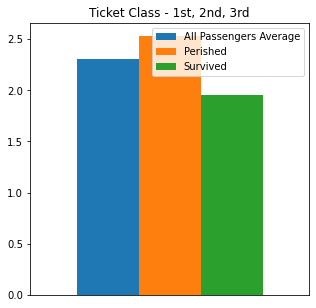

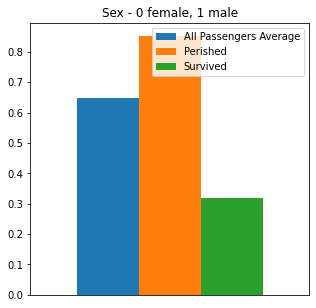

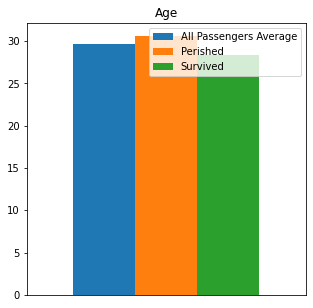

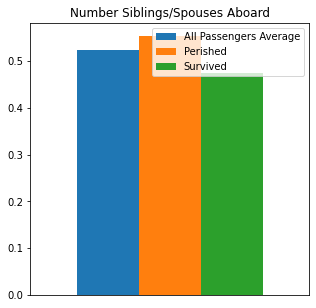

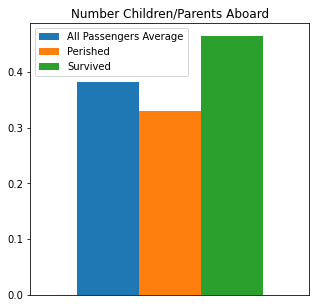

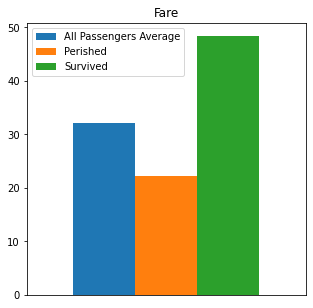

In [13]:
newSub = subdf.iloc[[0]]
newSub.plot.bar(title="Ticket Class - 1st, 2nd, 3rd",xticks=(),width=1,figsize = (5,5))
plt.show()
newSub = subdf.iloc[[1]]
newSub.plot.bar(title="Sex - 0 female, 1 male",xticks=(),width=1,figsize = (5,5))
plt.show()
newSub = subdf.iloc[[2]]
newSub.plot.bar(title="Age",xticks=(),width=1,figsize = (5,5))
plt.show()
newSub = subdf.iloc[[3]]
newSub.plot.bar(title="Number Siblings/Spouses Aboard",xticks=(),width=1,figsize = (5,5))
plt.show()
newSub = subdf.iloc[[4]]
newSub.plot.bar(title="Number Children/Parents Aboard",xticks=(),width=1,figsize = (5,5))
plt.show()
newSub = subdf.iloc[[5]]
newSub.plot.bar(title="Fare",xticks=(),width=1,figsize = (5,5))
plt.show()


In [14]:
print(titanic_data.corr()['Survived'])

Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64


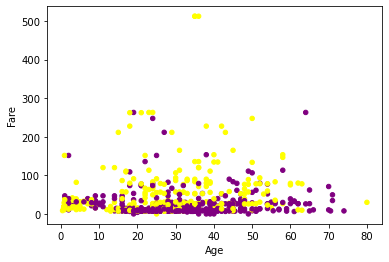

In [15]:
newsubdf = titanic_data.drop(['Pclass','Sex','SibSp','Parch'], axis=1)

newsubdf.Survived[newsubdf.Survived == 0] = 'purple'
newsubdf.Survived[newsubdf.Survived == 1] = 'yellow'
newsubdf.head()
ax = newsubdf.plot.scatter(x='Age',
                        y='Fare',
                        c='Survived'
)


###### Sources used:
###### https://cmdlinetips.com/2020/03/move-a-column-to-first-position-in-pandas-dataframe/
###### https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot